# Task-1 (Part-B)

Installing lower version of pandas (for using pandas profiling module) 

In [ ]:
! pip install pandas==0.25

     |████████████████████████████████| 10.4 MB 29.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.0 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 0.25.0 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.25.0 which is incompatible.


Importing pandas profiling package


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

Reading data

In [ ]:
data_marketingmonthly=pd.read_csv("/content/marketing_monthly_data.csv")
data_transactiondetails=pd.read_csv("/content/transaction_details_data.csv")
data_transactionmonthly=pd.read_csv("transaction_monthly_data.csv")

Creating profile reports

In [ ]:
profile_marketingmonthly = ProfileReport(data_marketingmonthly)
profile_transactiondetails = ProfileReport(data_transactiondetails)
profile_transactionmonthly=ProfileReport(data_transactionmonthly)

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)
/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)
/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Displaying profile reports

In [ ]:
profile_marketingmonthly

Number of variables,43
Number of observations,79638
Total Missing (%),1.8%
Total size in memory,26.1 MiB
Average record size in memory,344.0 B
Numeric,32
Categorical,4
Boolean,5
Date,0
Text (Unique),0
Rejected,2


In [ ]:
profile_transactiondetails

Number of variables,6
Number of observations,149367
Total Missing (%),0.0%
Total size in memory,6.8 MiB
Average record size in memory,48.0 B
Numeric,1
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [ ]:
profile_transactionmonthly

# Task-2 (Part-A)

In [ ]:
monthlymarketingdata=data_marketingmonthly
transactiondetails=data_transactiondetails

Data cleaning

In [ ]:
#converting date to desired format
import datetime
monthlymarketingdata ['user_creation_date']=monthlymarketingdata['user_created_date'] \
                                                                         .apply(pd.to_datetime) \
                                                                         .dt.tz_localize(None)
transactiondetails ['user_creation_date']=transactiondetails['created_date'] \
                                                                         .apply(pd.to_datetime) \
                                                                         .dt.tz_localize(None)


In [ ]:
temp=transactiondetails.drop(columns=['created_date'])

In [ ]:
#filtering out completed transactions
condition = temp['transactions_state']=='COMPLETED'
transactions=temp.where(condition)

In [ ]:
condition=pd.DatetimeIndex(transactions['user_creation_date']).year==2018
transactions=transactions[condition]

Compiling dataset

In [ ]:
#calculating tenure
m=min(transactions['user_creation_date'])
transactions['tenure']= transactions['user_creation_date'] - m
transactions['tenure']= transactions['tenure'].dt.days

In [ ]:
#calculating metrics
transaction_count=pd.DataFrame(transactions.groupby('user_id')['amount_usd'].count().reset_index())
transaction_count['tenure']=transactions.groupby('user_id')['tenure'].sum().values
transaction_count['3_month_average_transactioncount']= (transaction_count['amount_usd']/transaction_count['tenure'])*90

transaction_value=pd.DataFrame(transactions.groupby('user_id')['amount_usd'].sum().reset_index())
transaction_value['tenure']=transactions.groupby('user_id')['tenure'].sum().values
transaction_value['3_month_average_transactionvalue']= (transaction_value['amount_usd']/transaction_value['tenure'])*90

transaction_type=pd.DataFrame(transactions.groupby('user_id')['transactions_type'].nunique().reset_index())
transaction_type['tenure']=transactions.groupby('user_id')['tenure'].sum().values
transaction_type['3_month_average_transactiontypes']= (transaction_type['transactions_type']/transaction_type['tenure'])*90

distinct_days=pd.DataFrame(transactions.groupby('user_id')['user_creation_date'].nunique().reset_index())
distinct_days['tenure']=transactions.groupby('user_id')['tenure'].sum().values
distinct_days['3_month_average_transactiondays']= (distinct_days['user_creation_date']/distinct_days['tenure'])*90


In [ ]:
#combining metrics to a single dataset
engagement = pd.DataFrame()
engagement=pd.merge(transaction_count,transaction_value,how='left',on='user_id')
engagement=pd.merge(engagement,transaction_type,how='left',on='user_id')
engagement=pd.merge(engagement,distinct_days,how='left',on='user_id')
engagement.columns

Index(['user_id', 'amount_usd_x', 'tenure_x',
       '3_month_average_transactioncount', 'amount_usd_y', 'tenure_y',
       '3_month_average_transactionvalue', 'transactions_type', 'tenure_x',
       '3_month_average_transactiontypes', 'user_creation_date', 'tenure_y',
       '3_month_average_transactiondays'],
      dtype='object')

In [ ]:
col_deleted =['amount_usd_x', 'tenure_x','amount_usd_y', 'tenure_y', 'transactions_type', 'tenure_x', 'user_creation_date', 'tenure_y']
engagement=engagement.drop(col_deleted,axis=1)

Data pre-processing

In [ ]:
#checking for null values in the dataset
engagement.isna().sum()

user_id                             0
3_month_average_transactioncount    0
3_month_average_transactionvalue    0
3_month_average_transactiontypes    0
3_month_average_transactiondays     0
dtype: int64

In [ ]:
#checking for infinte values in the dataset
from numpy import inf
filter= engagement['3_month_average_transactioncount']== inf
engagement[filter]

,user_id,3_month_average_transactioncount,3_month_average_transactionvalue,3_month_average_transactiontypes,3_month_average_transactiondays
3169,c_657,inf,inf,inf,inf


In [ ]:
#filtering out infinite values from the dataset
filter= engagement['3_month_average_transactioncount'] != inf
engagement = engagement[filter]

In [ ]:
engagement.describe()

,3_month_average_transactioncount,3_month_average_transactionvalue,3_month_average_transactiontypes,3_month_average_transactiondays
count,4928.000000,4928.000000,4928.000000,4928.000000
mean,0.599342,75.095579,0.348562,0.599326
std,2.410342,574.180135,2.408093,2.410343
min,0.248619,0.003030,0.002081,0.248619
25%,0.333293,5.847436,0.061405,0.333293
50%,0.399398,14.222275,0.146104,0.399339
75%,0.523161,36.065445,0.312772,0.522768
max,90.000000,19341.895586,90.000000,90.000000


We can observe many outiers and these need to be filtered out, before building model based on it.

In [ ]:
#Filtering out outlier values based on 1.5IQR criterion

#transaction count
Q1=engagement['3_month_average_transactioncount'].quantile(0.25)
Q3=engagement['3_month_average_transactioncount'].quantile(0.75)
IQR=Q3-Q1
condition1 = engagement['3_month_average_transactioncount']>=(Q1-1.5*IQR) 
condition2 = engagement['3_month_average_transactioncount']<=(Q3+1.5*IQR)
engagement=engagement[condition1 & condition2]

#transaction value
Q1=engagement['3_month_average_transactionvalue'].quantile(0.25)
Q3=engagement['3_month_average_transactionvalue'].quantile(0.75)
IQR=Q3-Q1
condition1 = engagement['3_month_average_transactionvalue']>=(Q1-1.5*IQR) 
condition2 = engagement['3_month_average_transactionvalue']<=(Q3+1.5*IQR)
engagement=engagement[condition1 & condition2]

#transaction types
Q1=engagement['3_month_average_transactiontypes'].quantile(0.25)
Q3=engagement['3_month_average_transactiontypes'].quantile(0.75)
IQR=Q3-Q1
condition1 = engagement['3_month_average_transactiontypes']>=(Q1-1.5*IQR) 
condition2 = engagement['3_month_average_transactiontypes']<=(Q3+1.5*IQR)
engagement=engagement[condition1 & condition2]

#transaction days
Q1=engagement['3_month_average_transactiondays'].quantile(0.25)
Q3=engagement['3_month_average_transactiondays'].quantile(0.75)
IQR=Q3-Q1
condition1 = engagement['3_month_average_transactiondays']>=(Q1-1.5*IQR) 
condition2 = engagement['3_month_average_transactiondays']<=(Q3+1.5*IQR)
engagement=engagement[condition1 & condition2]

In [ ]:
engagement.describe()

,3_month_average_transactioncount,3_month_average_transactionvalue,3_month_average_transactiontypes,3_month_average_transactiondays
count,3727.000000,3727.000000,3727.000000,3727.000000
mean,0.390503,16.067147,0.162755,0.390483
std,0.089433,15.523201,0.140186,0.089424
min,0.248619,0.003030,0.002081,0.248619
25%,0.322490,4.759471,0.050765,0.322490
50%,0.373887,10.710397,0.113350,0.373887
75%,0.442260,21.904135,0.254237,0.442260
max,0.650787,71.620055,0.586957,0.650787


In [ ]:
#Scaling dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std=False)
col_selected = ['3_month_average_transactioncount','3_month_average_transactionvalue','3_month_average_transactiontypes','3_month_average_transactiondays']
scaler.fit(engagement[col_selected])
engagement[col_selected]=scaler.transform(engagement[col_selected])

# Task-2 (Part-B)

In [ ]:
#applying hierarchial clustering
import numpy as np
from sklearn.cluster import AgglomerativeClustering
X = np.array(engagement[col_selected])
clustering = AgglomerativeClustering().fit(X)
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
engagement['label_hierarchial']=clustering.labels_

In [ ]:
#applying KMeans clustering
from sklearn.cluster import KMeans
X = np.array(engagement[col_selected])
kmeans = KMeans(n_clusters=2, random_state=100).fit(X)
engagement['label_KMeans']=kmeans.labels_

In [ ]:
# calculating centroids from hierarchial clustering
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X, engagement['label_hierarchial'])
pd.DataFrame(clf.centroids_)

,0,1,2,3
0,-0.002102,-4.726091,-0.002681,-0.002096
1,0.015041,33.816885,0.019182,0.014995


In [ ]:
#calculating centroids from Kmeans clustering
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3
0,0.015315,25.813002,0.008535,0.015285
1,-0.003988,-6.721681,-0.002222,-0.003980


Checking clustering results

In [ ]:
#checking for data imbalance in hierarchial clustering
engagement['label_hierarchial'].value_counts()

0    3270
1     457
Name: label_hierarchial, dtype: int64

In [ ]:
#checking for data imbalance in kmeans clustering
engagement['label_KMeans'].value_counts()

1    2958
0     769
Name: label_KMeans, dtype: int64

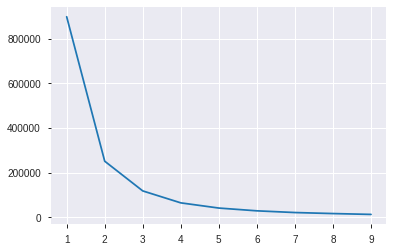

In [ ]:
#plotting elbow curve to check the optimal number of clusters 
import matplotlib.pyplot as plt
%matplotlib inline

results = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state=100).fit(X)
  results.append(kmeans.inertia_)

plt.plot(range(1,10),results)

Evidently, optimal number of clusters is 2

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score
print("Silhouette score for hierarchial clustering: ",silhouette_score(engagement[col_selected],engagement['label_hierarchial']))
print("Silhouette score for K means clustering: ",silhouette_score(engagement[col_selected],engagement['label_KMeans']))

Silhouette score for hierarchial clustering:  0.6990311891253508
Silhouette score for K means clustering:  0.6986452808419269


As evident from the silhouette scores, hierarchial clustering is better as its silhouette score is marginally better. Further the score is close to 1 which indicates excellent segregation of clusters

In [ ]:
pd.DataFrame(scaler.inverse_transform(clf.centroids_))

,0,1,2,3
0,0.388401,11.341057,0.160074,0.388387
1,0.405544,49.884032,0.181937,0.405478


Hierarchial clustering suggests that major point of difference between low engaged cluster and high engaged cluster is the 3-month average transaction value. 

In case of low engaged customer cluster, centroid value is Rs 11 while that of high engaged cluster, the value is Rs 50.